# TP : parcours d'un arbre binaire

## Introduction

Un arbre binaire peut être parcouru afin de connaître les noeuds qu’il contient. On peut parcourir cet arbre verticalement, appelé parcours en profondeur, mais aussi horizontalement, appelé parcours en largeur.

Il y a trois façons distinctes de parcourir un arbre en profondeur.

- parcours **infixe** : on parcourt l’arbre gauche, on note la racine puis on parcourt l’arbre droit.
- parcours **préfixe** : on note la racine de l’arbre, ensuite on parcourt l’arbre gauche puis l’arbre droit.
- parcours **suffixe** : on parcourt l’arbre gauche, puis l’arbre droit et on note la racine.

Le parcours en largeur d'un arbre consiste à visiter chaque noeud par niveau, de la racine aux feuilles les plus profondes.

On donne l'arbre binaire ci-dessous

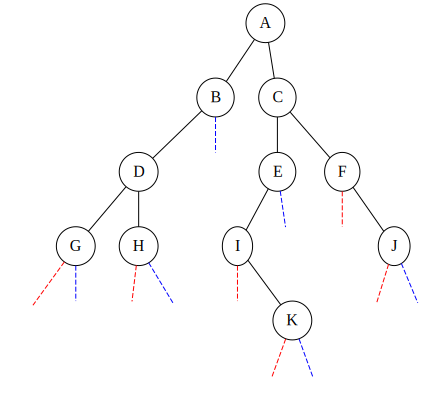

In [1]:
from arbre_binaire import Arbre, Noeud
from draw_arbre import afficher

a = Arbre(Noeud('A',\
                Noeud('B',\
                      Noeud('D',\
                            Noeud('G'),\
                            Noeud('H')),\
                      None),\
                Noeud('C',\
                      Noeud('E',\
                            Noeud('I',\
                                  None,\
                                  Noeud('K')),\
                            None),\
                      Noeud('F',\
                            None,\
                            Noeud('J')))))

afficher(a)

## Parcours en profondeur

1. Fonction parcours_infixe avec affichage des noeuds
2. Fonction parcours_infixe avec renvoie du parcours sous forme de chaine de caractères (string)
3. Fonction parcours_prefixe et parcours_suffixe
4. Fonction parcours_infixe avec renvoie du parcours dans une file.
5. Tests avec les arbres binaires de l'introduction

In [2]:
# Fonction parcours_infixe avec affichage des noeuds

def parcours_infixe(arbre):
    if not arbre.est_vide():
        parcours_infixe(arbre.fils_gauche())
        print(arbre.racine.valeur, end=" - ")
        parcours_infixe(arbre.fils_droit())
        
parcours_infixe(a)

G - D - H - B - A - I - K - E - C - F - J - 

In [5]:
# Fonction parcours_infixe avec renvoie du parcours sous forme de chaine de caractères (string)

def parcours_infixe(arbre,parcours=""):
    if not arbre.est_vide():
        parcours = parcours_infixe(arbre.fils_gauche(), parcours)
        parcours += arbre.racine.valeur
        parcours = parcours_infixe(arbre.fils_droit(), parcours)
    return parcours
        
parcours_infixe(a)

'GDHBAIKECFJ'

In [7]:
# Fonction parcours_prefixe

def parcours_prefixe(arbre,parcours=""):
    if not arbre.est_vide():
        print(arbre.racine.valeur, end=" - ")
        parcours_prefixe(arbre.fils_gauche())
        parcours_prefixe(arbre.fils_droit())
        
parcours_prefixe(a)

A - B - D - G - H - C - E - I - K - F - J - 

In [8]:
# Fonction parcours suffixe

def parcours_suffixe(arbre,parcours=""):
    if not arbre.est_vide():
        parcours_suffixe(arbre.fils_gauche())
        parcours_suffixe(arbre.fils_droit())
        print(arbre.racine.valeur, end=" - ")
        
parcours_suffixe(a)

G - H - D - B - K - I - E - J - F - C - A - 

In [11]:
from file import creer_file

F = creer_file()

def parcours_infixe(arbre,F):
    if not arbre.est_vide():
        parcours_infixe(arbre.fils_gauche(), F)
        F.enfiler(arbre.racine.valeur)
        parcours_infixe(arbre.fils_droit(),F)
    return F

parcours_infixe(a,F)

G < D < H < B < A < I < K < E < C < F < J < ...

## Parcours en largeur

In [13]:
from file import creer_file

# Fonction parcours en largeur

def parcours_largeur(arbre):
    F = creer_file()
    F.enfiler(arbre)
    G = creer_file()
    while not F.est_vide():
        a = F.defiler()
        if not a.est_vide():
            G.enfiler(a.racine.valeur)
            F.enfiler(a.fils_gauche())
            F.enfiler(a.fils_droit())
    return G

parcours_largeur(a)

A < B < C < D < E < F < G < H < I < J < K < ...